In [115]:

import os
import sys
assert sys.version_info >= (3, 5) # assert python >= 3.5

import sklearn
assert sklearn.__version__ > "0.20" 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

In [116]:
plots_dir = "./plots"
os.makedirs(plots_dir, exist_ok=True)

def save_fig(img_name, resolution=200, img_extension="png"):
    img_path = os.path.join(plots_dir, img_name + "." + img_extension)
    print(f"Saving Image: {img_name}")
    plt.tight_layout()
    plt.savefig(img_path, format=img_extension, dpi=resolution)

# Clustering
## Introduction – Classification vs Clustering

In [117]:
from sklearn import datasets

In [118]:
# loading iris dataset
data = datasets.load_iris()

# fetch training data
X = data.data

# fetch target labels
y = data.target

# get fetaures names
print(data.feature_names)

# get target names
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [119]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

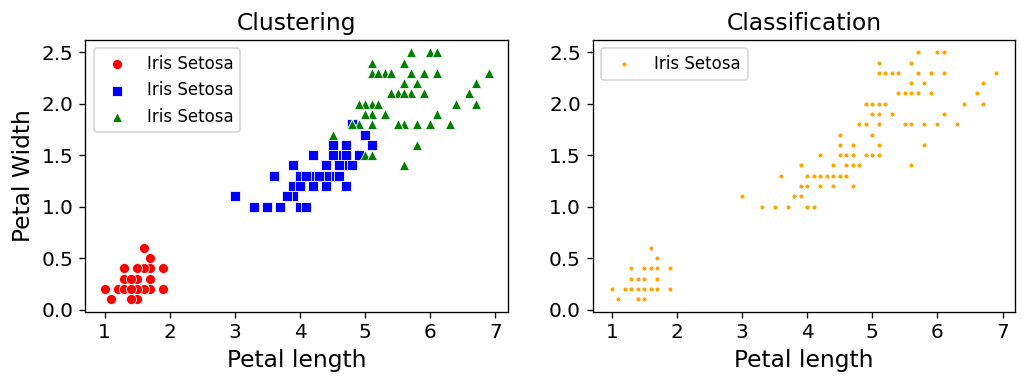

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=120)
sns.scatterplot(x=X[y==0, 2], y=X[y==0, 3], color="red", marker="o", label="Iris Setosa", ax=ax1)
sns.scatterplot(x=X[y==1, 2], y=X[y==1, 3], color="blue", marker="s", label="Iris Setosa", ax=ax1)
sns.scatterplot(x=X[y==2, 2], y=X[y==2, 3], color="green", marker="^", label="Iris Setosa", ax=ax1)

ax1.set_xlabel("Petal length")
ax1.set_ylabel("Petal Width")
ax1.set_title("Clustering", fontsize=14)

sns.scatterplot(x=X[:, 2], y=X[:, 3], color="orange", marker=".", label="Iris Setosa", ax=ax2)
ax2.set_xlabel("Petal length")
ax2.set_title("Classification", fontsize=14)
plt.legend()
plt.show()

fig.savefig("./plots/classification_vs_clustering.png")

In [127]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [134]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [135]:
y_preds = gm.predict(X)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [150]:
mapping = {}
for class_id in np.unique(y):
    from scipy import stats
    mode, _ = stats.mode(y_preds[y==class_id])
    print(f"mode: {mode}", end="\t")
    print(f"class_id: {class_id}")
    mapping[mode[0]] = class_id
    
mapping

mode: [1]	class_id: 0
mode: [2]	class_id: 1
mode: [0]	class_id: 2


{1: 0, 2: 1, 0: 2}